In [1]:
from whoscored import *
import json
import pandas as pd
from utils import *

In [2]:
BASE_DIR = os.path.join('..', 'data')
ENGINEERED_DIR = os.path.join(BASE_DIR, 'engineered')
SEASON_DIR = os.path.join(ENGINEERED_DIR, '2023')
MATCHES_DIR = os.path.join(SEASON_DIR, 'matches')

def get_data(round_match):
    data = None
    filepath = os.path.join(MATCHES_DIR, str(round_match), f"{round_match}_round.txt")
    with open(filepath, 'rt') as json_data_txt:
        data = json.loads(json_data_txt.read())
    return data

In [3]:
round_match = 9
data = get_data(round_match)
events_dict, players_df, teams_dict = extract_data_from_dict(data)
passes_df = get_passes_df(events_dict)


home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(home_team_id, passes_df, players_df)

away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(away_team_id, passes_df, players_df)


In [4]:
fluminense_players = players_df.loc[players_df['teamId'] == home_team_id]


In [5]:
shots_df = get_shots_df(events_dict)


In [12]:
flu_shots = shots_df.loc[shots_df['teamId'] == home_team_id]


In [13]:
flu_shots = flu_shots.filter(['x', 'y','endX', 'endY','playerId','isShot', 'isGoal'])

In [14]:
mask_goal = flu_shots['isGoal'] == True

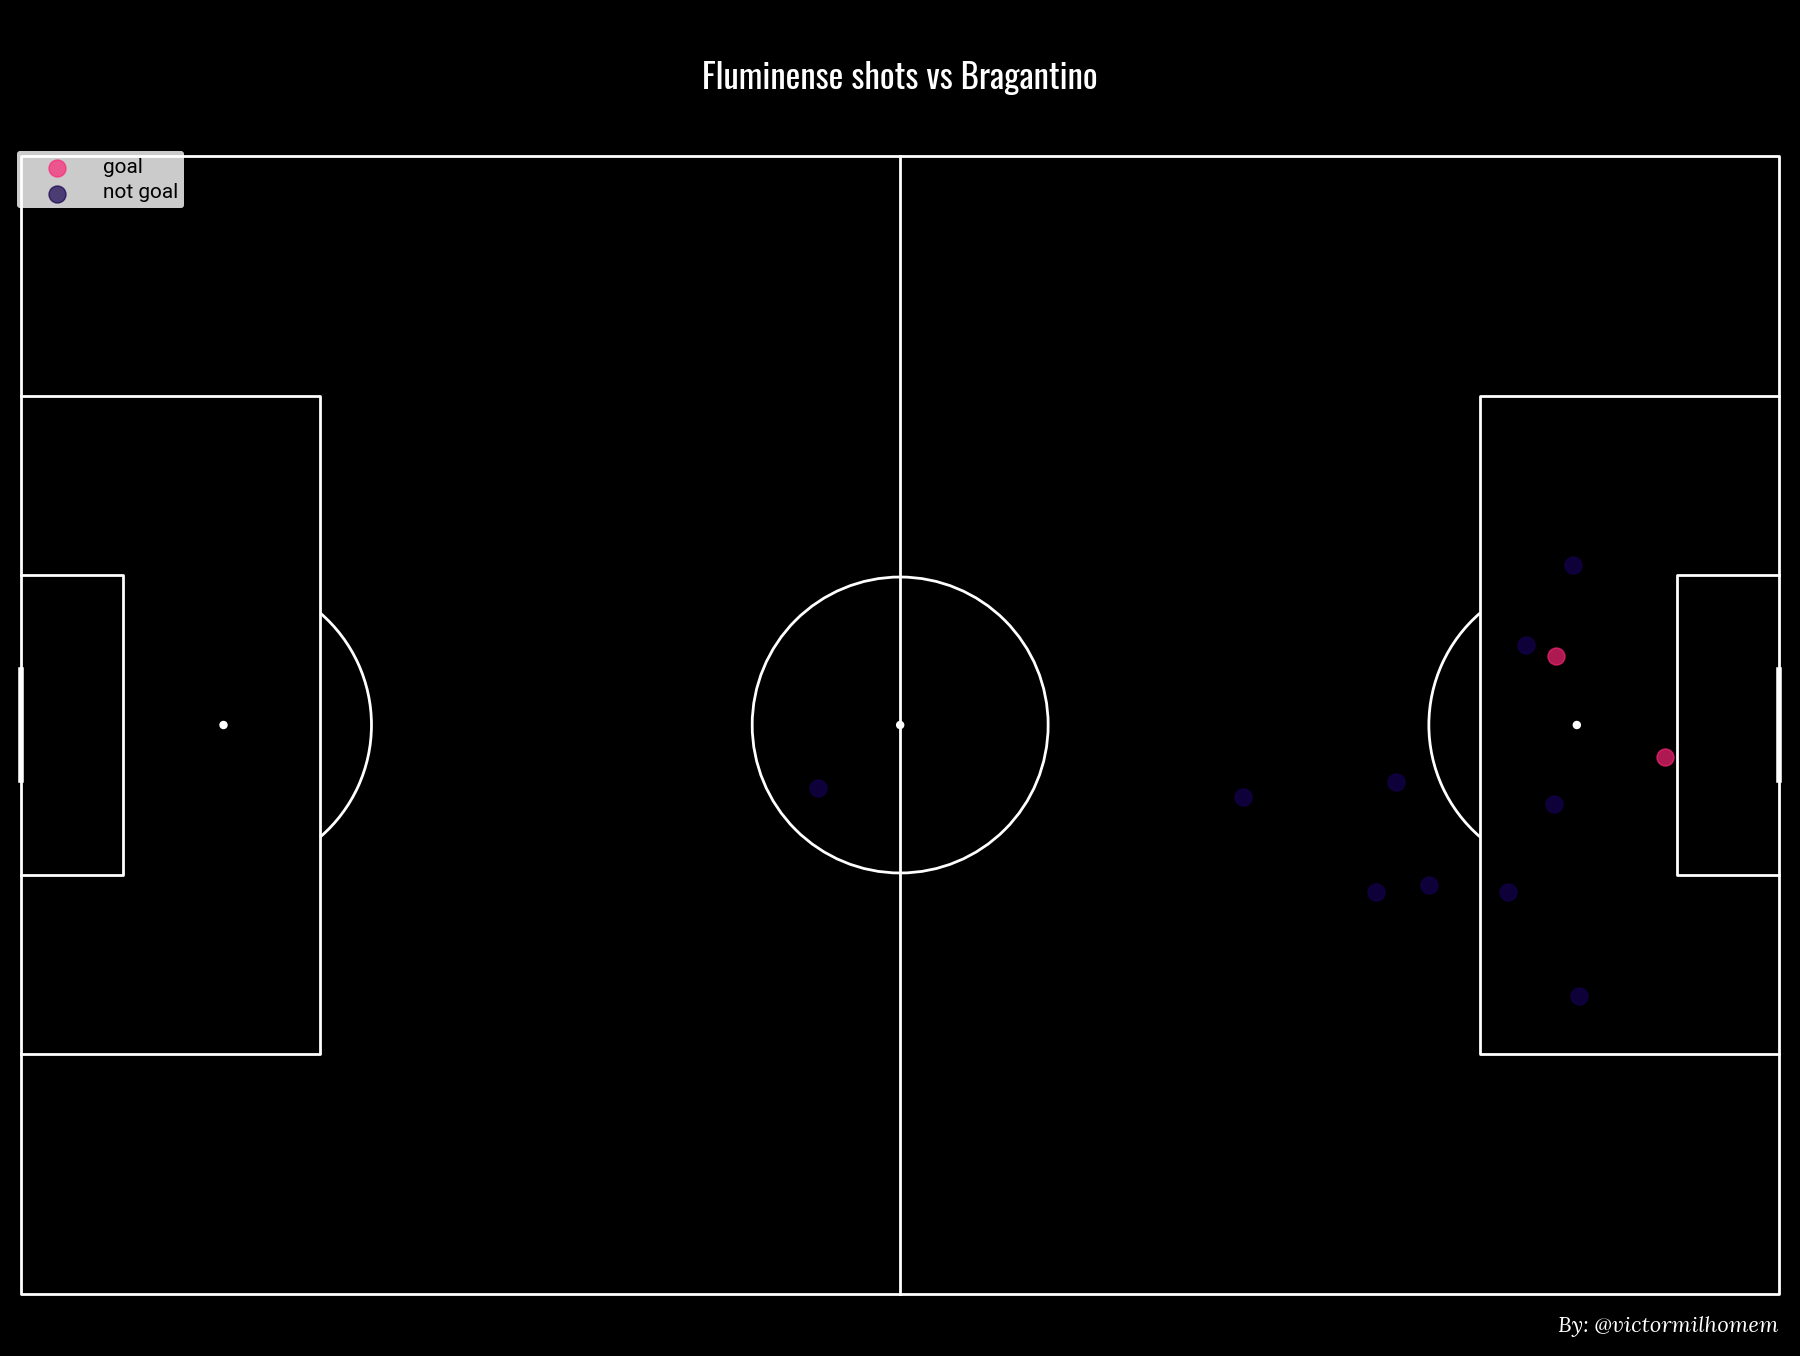

In [27]:
def create_shots_map(shots_df, title, credit="By: @victormilhomem", color_palette=COLORS_PALETTE_13):
    pitch = Pitch(pitch_type='opta', pad_bottom=1, pad_top=1,
                    pad_left=1, pad_right=1,
                    line_zorder=2, line_color='#ffff', pitch_color=color_palette["bkg"])
    fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=13.5,
                                title_height=0.1, title_space=0, grid_height=0.86,
                                axis=False)
    mask_goal = shots_df['isGoal'] == True
    fig.set_facecolor(color_palette['bkg'])
    axs["pitch"].scatter(x=shots_df[mask_goal]["x"], y=shots_df[mask_goal]["y"], s=150, alpha=.7, c=color_palette["color3"], label="goal")
    axs["pitch"].scatter(x=shots_df[~mask_goal]["x"], y=shots_df[~mask_goal]["y"], s=150, alpha=.7, c=color_palette["color1"], label="not goal")
    legend = axs['pitch'].legend(facecolor='#ffff', handlelength=5, edgecolor='None',
                                    prop=FONT_ROBOTO, loc='upper left')
    for text in legend.get_texts():
        text.set_fontsize(15)
    axs['title'].text(0.5, 0.5, title,
                        fontsize=25, fontproperties=FONT_OSWALD, va='center', ha='center', color="#ffff")
    axs['endnote'].text(1, 0.5, credit,
                        fontsize=16, fontproperties=FONT_LORA_ITALIC, va='center', ha='right', color="#ffff")

create_shots_map(flu_shots, "Fluminense shots vs Bragantino")